# introduction on ECG and ECG sigals:
the electrocardiogram (ECG) is a time varying signals reflecting the ionic current flow which causes the cardiac fibers to contract and subsequently relax.The surface ECG is obtained by recording the potential differance between two electrodes placed on the surface of the skin.A signal normal cycle of the ECG represents the successive atrial depolarisation or repolarisation and ventricular depolarisation or repolarisation which occurs with every heart beat.

Simply put, the ECG(EKG)is device that measures and records the electrical activity of the heart from electrodes placed on the skin in specific locations.
 
The ECG signals are formed of P wave,QRS complex, and T wave.the change in parameters indicate an illness of the heart that may occur by any reason, The P wave reflects the activation of the right and left atria.The QRS complex shows depolarijastion of the right and left ventricles.
                      
      

# Ans4:


 The length of the time array is: 43081


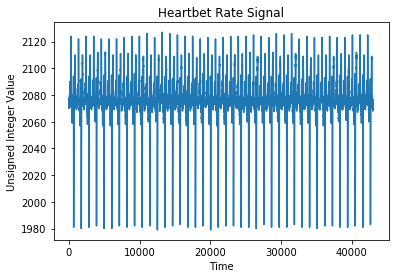

In [82]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook

%matplotlib inline

#now we import different packages that will allow to do math, linear algebra, numerical operations, array operations and plotting

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file
v = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Signal = np.fromfile(v,count=-1,dtype=np.uint16)
print('\n The length of the time array is: ' + str(len(Signal)) )

plt.plot(Signal)
plt.title("Heartbet Rate Signal")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")
v.close() #close the file

# Ans 5:
you're sampling the heart signal at rate fs so you have fs samples per second. You have between 1 and 1.67 beats per second. If you plot fs to 1.67fs samples you'll get one beat, so you need to plot between 5fs and 8.33fs samples to get 5 beats.that is 3600 and 5997.6 samples to get s beats.

# Ans6

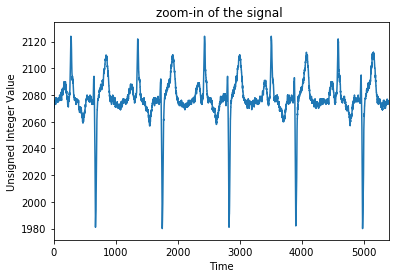

In [83]:
plt.xlim(0, 5400)
plt.plot(Signal)
plt.title("zoom-in of the signal ")
plt.xlabel("Time")
plt.ylabel("Unsigned Integer Value")

# Ans 7:
The heart rate bet is lower because the PR interval is smaller than the QT interval and it is significuntly large as per the given ECG signal.

# Ans 8:
 the heart rate is normally between 60 (beats per minute) and 100 (beats per minute).
 The basic way to calculate the rate is simple
 Rate = 60/(R-R interval) [65]
 here we can see that the the time interval between two peaks is 1.5 sec, here one block is equal to 0.25 sec
5 large blocks: 34
4 large blocks: 40
3 large blocks: 48
2 large blocks: 120
1 large block: 240
means that here we get the RR peaks at evry 4 blocks menas the Heart rate is around 40 to 45 BPM.[65]

ans 9
\ : DFT for unfiltered signal :


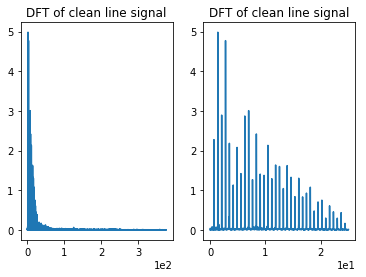

In [84]:
print("ans 9")
print('\ : DFT for unfiltered signal :')

Line=Signal[:43080]
#we first eliminate dc
dataF=Line-np.mean(Line)
L=len(dataF)

#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,750/2.,750/43080.)
Y=np.fft.fft(dataF)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:21540])
plt.title('DFT of clean line signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>25)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of clean line signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ans 10

 : The  freq at max peak is: 4.98149090804 Hz

 The  maxfreq that the RR peak occurs is  :1.375
ans 11

 : The Heartbeats for given signal is : 43.6363636364 BPM


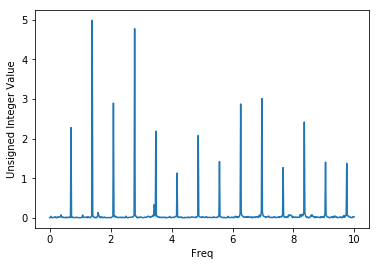

In [85]:
i=np.where(f>10)
i=i[0]
plt.xlabel('Freq')
plt.ylabel('Unsigned Integer Value')
plt.plot(f[0:i[0]], Pyy[0:i[0]]) 
peak=np.amax(Pyy)
print ("ans 10")
print('\n : The  freq at max peak is: ' + str(peak)+' Hz')
#  Here we find that my maximum peak is 4.98 Hz and it ocurs between 0 to 1.4 sec.
# means my step size(43081/750)*1.45 = 80 for loop range   
# I choose (0,8) for my loop

step=0
k=0
x=0
for k in range (0,80):
    if (Pyy[x]) > peak:
        x=k
        
    step=((750)/43081)*k
    # now frequency at maximum peak occurs is
    maxfreq=str(round(step,3))
    # means the heart rate per minutes is :
    
  
print('\n The  maxfreq that the RR peak occurs is  :'+str(maxfreq)) 

hrtbeat = 60/1.375
print ("ans 11")
print('\n : The Heartbeats for given signal is : '+ str(hrtbeat) + ' BPM')



# Ans 12:
From The DFT , we can see that the maximum amplitude shows the frequency at which the large peak occurs is 4.99 point.So we can conclude that other than this signals are harmonics or noise.because high peaks are above 3hz.the last graph that the first peak occurs at 0.74 Hz.the heart bet per minute is
60*0.74=44 bpm approx.

# ans 13:
Low pass filters used in the ECG equipment may change the amplitude, wavelength, and displacement of (ECG) intervals. When using lowpass filters, small frequency cutoff value makes the low-amplitude potentials of 5-20 mV virtually invisible on the ECG.The amplitude ripple of filters in the passband and a nonlinear character of phase response contribute to cardiac signal disturbance equal to the informative low-amplitude of the heart biopotential by the order of magnitude.

The overall results that the reduction in amplitude power doesn't make a sirious problem. 

i say that the variations in the all intervals in next comparision graph between the filtered and unfiltered signal 


# Ans 14 and 15:
Butterworth filter with 100 Hz cutoff frequency and frequency responce of this filter.

# Ans 16:

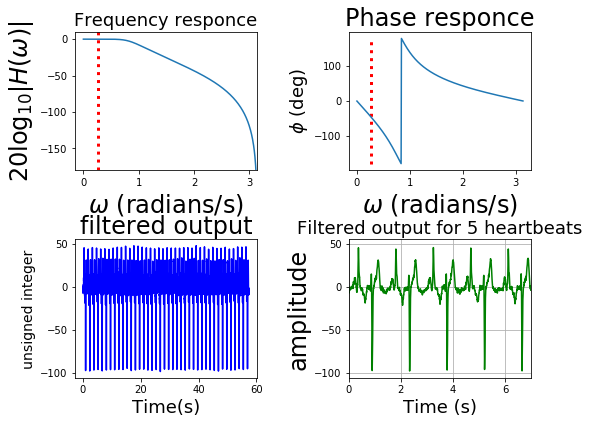

In [86]:
from __future__ import division
from matplotlib import gridspec
from scipy import signal
fig=plt.figure()
fig.set_size_inches((18,14))

gs = gridspec.GridSpec(4,4)
gs.update( wspace=0.5, hspace=0.5)

fs=750 # sampling freq
NF=fs/2 # nyquiest freq
cutoff= 100 # cutoff freq
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF) # putput siganl with filter

x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce',fontsize=18)
ax.plot(w, 20 * np.log10(abs(h))) 
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=24)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=24)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase responce',fontsize=24)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=24)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=18)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s,'b')
ax.set_title('filtered output',fontsize=24)
ax.set_xlabel('Time(s)',fontsize=18)
ax.set_ylabel('unsigned integer',fontsize=14)


ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s,'g')
ax.set_xlim(xmax = 7, xmin =0)
ax.set_title('Filtered output for 5 heartbeats',fontsize=18)
ax.set_ylabel("amplitude",fontsize=24)
ax.set_xlabel('Time (s)',fontsize=18)

ax.grid()

# Ans 16:
DFT and Implse responce of the filtered siganl.

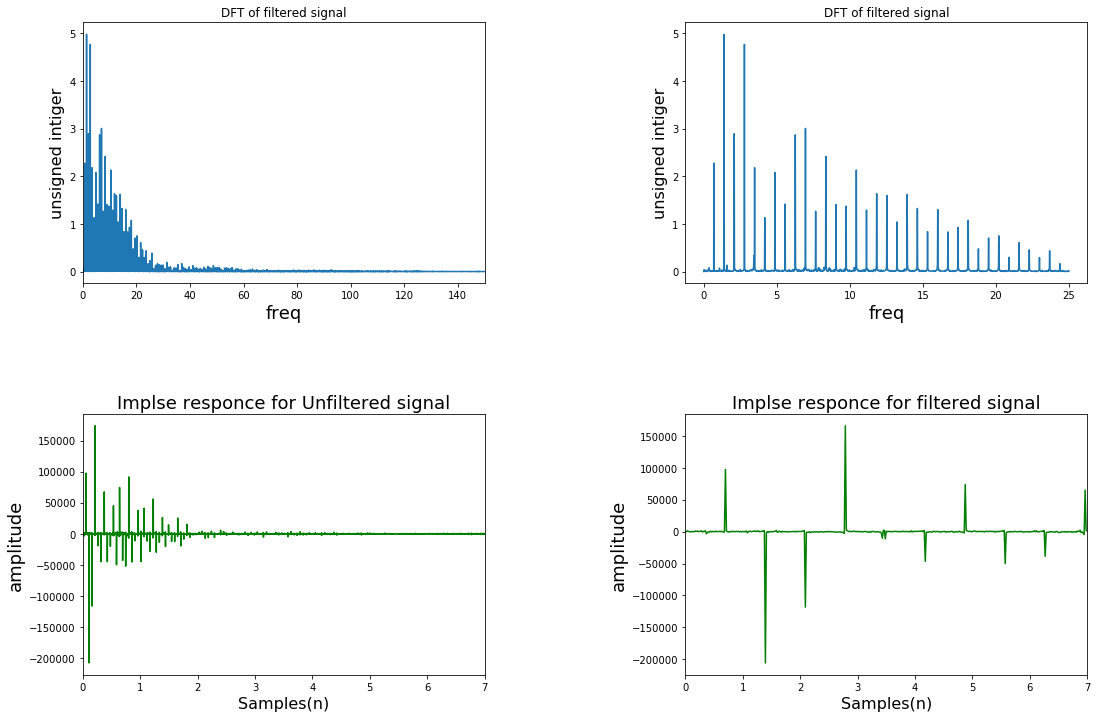

In [87]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((18,12))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
LL=len(s)
ff=np.arange(0,750,750/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/LL
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:43080])
ax.set_title('DFT of filtered signal')
ax.set_xlabel("freq",fontsize=18)
ax.set_ylabel('unsigned intiger',fontsize=16)
ax.set_xlim(xmax = 150, xmin =0)
indx=np.where(ff>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_xlabel("freq",fontsize=18)
ax.set_ylabel('unsigned intiger',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,Y,'g')
ax.set_xlim(xmax = 7, xmin =0)
ax.set_title('Implse responce for Unfiltered signal',fontsize=18)
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Samples(n)',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(ff,YY,'g')
ax.set_xlim(xmax = 7, xmin =0)
ax.set_title('Implse responce for filtered signal',fontsize=18)
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Samples(n)',fontsize=16)

# Ans 17:
Butterworth filters has smooth, maximum flat responce than other kind of filters and it reduces the amplitude by -3 db or depends on the cutoff frequency. It provides a near 0 attenuation until near the cutoff frequency and then descends into attenuation smoothly.
From the frequency responce for my output of the butterworth filter that the transition from 0 to 100 hz is flat and it will be better if we increase to the nth order but it is not possible in real.It doesnt affect the sampling frequency.

    The magnitude response of the butterworth filter decreases with increase in frequency from 0 to W,The width of the transition band is more in Butterworth filter and the slope is changing with frequency.

# bibliography:
1.http://www.electronics-tutorials.ws/filter/filter_8.html
2. http://doi.ieeecomputersociety.org/10.1109/PCCGA.2003.123Rajoub 
3.Lu, Zhitao, Dong Youn Kim, and William A. Pearlman. "Wavelet compression of ECG signals by the set partitioning in hierarchical trees algorithm." IEEE transactions on Biomedical Engineering 47.7 (2000): 849-856.
4.Rajoub BA. An efficient coding algorithm for the compression of ECG signals using the wavelet transform. IEEE transactions on biomedical engineering. 2002 Apr;49(4):355-62.
5.Stadler R, Nelson S, Stylos L, Sheldon TJ, inventors; Medtronic, Inc., assignee. Method and apparatus for filtering electrocardiogram (ECG) signals to remove bad cycle information and for use of physiologic signals determined from said filtered ECG signals. United States patent US 6,115,628. 2000 Sep 5.
6.Selesnick IW, Burrus CS. Generalized digital Butterworth filter design. IEEE Transactions on signal processing. 1998 Jun;46(6):1688-94.
7.https://www.ieee.org/searchresults/index.html?cx=006539740418318249752%3Af2h38l7gvis&cof=FORID%3A11&qp=&ie=UTF-8&oe=UTF-8&q=butterwarthfilter
8.Mishra, S., Das, D., Kumar, R., & Sumathi, P. (2015). A power-line interference canceler based on sliding DFT phase locking scheme for ECG signals. IEEE Transactions on Instrumentation and Measurement, 64(1), 132-142.
